# Regression Analysis HW_1
### 2018111479 김남민

## Problem 1. Table 1
### Table 1 gives data concerning the performance of the 26 National Football League teams in 1976. It is suspected that the number of yards gained rushing by opponents (x8) has an effect on the number of games won by a team (y).

- a. Fit a simple linear regression model relating games won y to yards gained rushing by opponents x8.

- b. Construct the analysis-of-variance table and test for significance of regression.

- c. Find a 95% CI on the slope.

- d. What percent of the total variability in y is explained by this model?

- e. Find a 95% CI on the mean number of games won if opponents’ yards rushing is limited to 2000 yards.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [60]:
table1 = pd.read_csv('table1.txt', sep='\t')
table1

,y,x1,x2,x3,x4,X5,X6,X7,X8,x9
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
3,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
5,11,2309,2927,39.7,74.1,8,786,61.0,1848,2339
6,10,2528,2341,38.1,65.4,12,754,66.1,1564,2092
7,11,2147,2737,37.0,78.3,-1,761,58.0,1821,1909
8,4,1689,1414,42.1,47.6,-3,714,57.0,2577,2001
9,2,2566,1838,42.3,54.2,-1,797,58.9,2476,2254


## 1-a. Fit a simple linear regression model relating games won y to yards gained rushing by opponents x8.

In [61]:
# 1. fit a simple linear regression model relating games won (y) to yards gained rushing by opponents (x8).
# create X and y
X = table1['X8']
y = table1['y']
# Create Train and Test Data sets (70% and 30% or 80% and 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
# Train the model using the training sets (statsmodels)
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,X8
13,1.0,1709
20,1.0,2203
4,1.0,1457
27,1.0,2560
0,1.0,2205


In [62]:
# Training(fitting) the model
lr = sm.OLS(y_train, X_train_sm) # initialization
lr_model = lr.fit() # fitting / training
lr_model.params

const    21.470512
X8       -0.006763
dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
from scipy import stats

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)
print(lm.intercept_)
print(lm.coef_)

(19, 1)
(19,)
(9, 1)
(9,)
21.470512002222815
[-0.00676282]


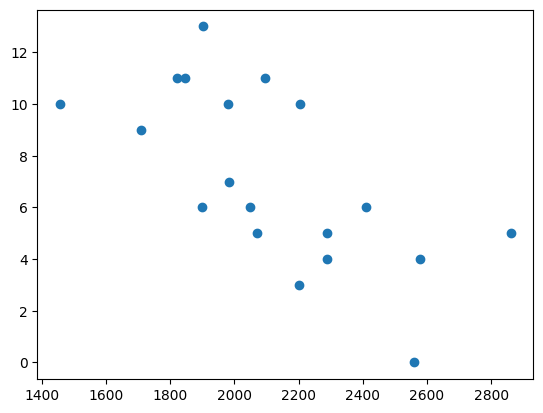

In [63]:
# visualize
plt.scatter(X_train, y_train)

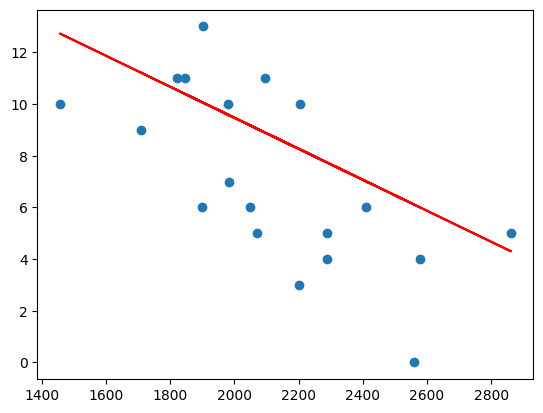

In [64]:
# Scatterplot with regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 21.470+(-0.006)*X_train,'r')
plt.show()

## 1-b. Construct the analysis-of-variance table and test for significance of regression.

In [65]:
y_train_pred=lr_model.predict(X_train_sm)

residual = y_train-y_train_pred
print(residual.sum())
print(residual)

-1.2079226507921703e-13
13   -0.912854
20   -3.572021
4    -1.617084
27   -4.157695
0     3.441505
1     3.704357
17    2.877914
14   -2.614392
18    0.834645
19   -1.990419
2     2.020415
10   -1.053078
16   -2.457950
15   -0.997181
23    1.913107
7     1.844582
3     4.399133
24   -1.620258
8    -0.042727
dtype: float64


Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

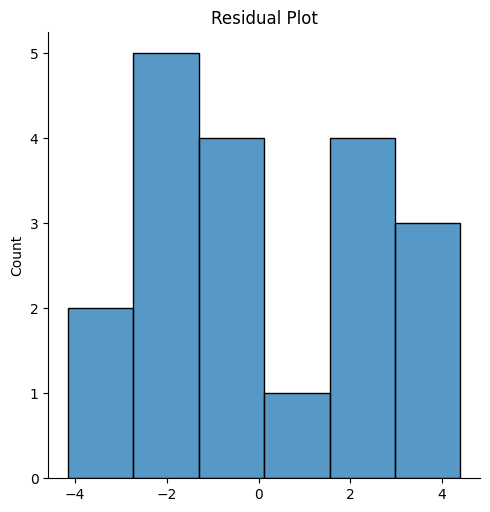

In [66]:
plt.figure()
sns.displot(residual)
plt.title("Residual Plot")

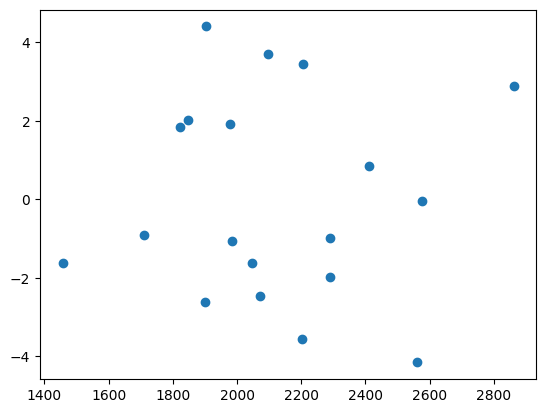

In [67]:
plt.scatter(X_train, residual)
plt.show()

In [68]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     13.08
Date:                Wed, 04 Oct 2023   Prob (F-statistic):            0.00213
Time:                        13:14:59   Log-Likelihood:                -44.477
No. Observations:                  19   AIC:                             92.95
Df Residuals:                      17   BIC:                             94.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4705      4.004      5.362      0.0

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 1-c. Find a 95% CI on the slope.

In [75]:
coefficients = lm.coef_
mse_resid = np.mean((lm.predict(X_train_lm) - y_train_lm) ** 2)

In [76]:
n = len(y_train_lm)
k = len(X_train_lm[0])
std_err = np.sqrt(mse_resid / (n - k) * np.diag(np.linalg.inv(np.dot(X_train_lm.T, X_train_lm))))

In [77]:
alpha = 0.05
t_value = stats.t.ppf(1 - alpha / 2, n - k)
conf_int = np.vstack((coefficients - t_value * std_err, coefficients + t_value * std_err)).T
print(conf_int)

[[-0.00689621 -0.00662943]]


## 1-d. What percent of the total variability in y is explained by this model?

In [78]:
prediction = lm.predict(X_test_lm)
residual = (y_test_lm - prediction)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_lm, prediction)
r_squared = r2_score(y_test_lm, prediction)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3.396774923411799
r_square_value : 0.7275853774293508


## Problem 2. Table 2
### Table2 presents data collected during a solar energy project at Georgia Tech.

- a. Fit a simple linear regression model relating total heat flux y (kilowatts) to the radial deflection of the deflected rays x4 (milliradians).

- b. Construct the analysis-of-variance table and test for significance of regression.

- c. Find a 99% CI on the slope.

- d. Calculate R2.

- e. Find a 95% CI on the mean heat flux when the radial deflection is 16.5 milliradians.

In [82]:
table2 = pd.read_csv('table2.txt', sep='\t')
table2

,y,x1,x2,x3,x4,X5
0,271.8,783.35,33.53,40.55,16.66,13.20
1,264.0,748.45,36.50,36.19,16.46,14.11
2,238.8,684.45,34.66,37.31,17.66,15.68
3,230.7,827.80,33.13,32.52,17.50,10.53
4,251.6,860.45,35.75,33.71,16.40,11.00
5,257.9,875.15,34.46,34.14,16.28,11.31
6,263.9,909.45,34.60,34.85,16.06,11.96
7,266.5,905.55,35.38,35.89,15.93,12.58
8,229.1,756.00,35.85,33.53,16.60,10.66
9,239.3,769.35,35.68,33.79,16.41,10.85


## 2-a. Fit a simple linear regression model relating total heat flux y (kilowatts) to the radial deflection of the deflected rays x4 (milliradians).

In [86]:
# table2 presents data collected during a solar energy project at Georgia Tech.
# Fit a simple linear regression model relating total heat flux y (kilowatts) to the radial deflection of the deflected rays x4 (milliradians).
# create X and y
X = table2['x4']
y = table2['y']
# Create Train and Test Data sets (70% and 30% or 80% and 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
# Train the model using the training sets (statsmodels)
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

# Training(fitting) the model
lr = sm.OLS(y_train, X_train_sm) # initialization
lr_model = lr.fit() # fitting / training
lr_model.params

const    645.159727
x4       -23.555447
dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
from scipy import stats

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)
print(lm.intercept_)
print(lm.coef_)

(20, 1)
(20,)
(9, 1)
(9,)
645.1597270948424
[-23.5554473]


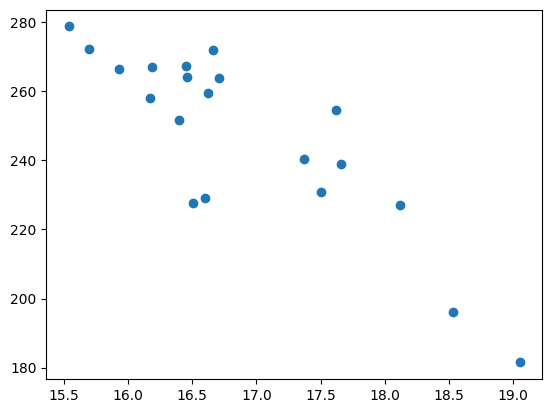

In [89]:
# visualize
plt.scatter(X_train, y_train)


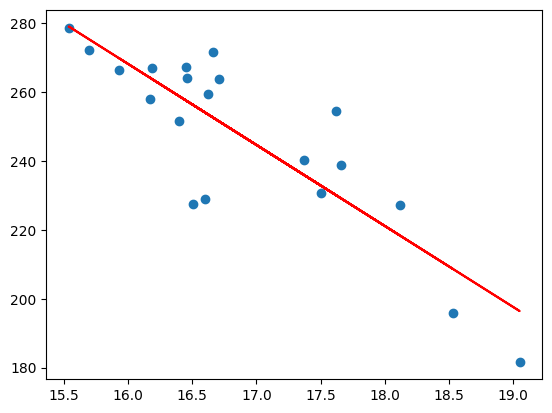

In [90]:
# Scatterplot with regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 645.1597+(-23.5554)*X_train,'r')
plt.show()

## 2-b. Construct the analysis-of-variance table and test for significance of regression.

In [91]:
y_train_pred=lr_model.predict(X_train_sm)
residual = y_train-y_train_pred
print(residual.sum())
print(residual)

1.0516032489249483e-12
13     3.202965
21    24.387254
4     -7.250391
28    12.251797
0     19.074025
1      6.562935
17   -12.677289
14     5.931807
18    -0.408076
19    -3.039205
2      9.629472
20     9.727381
10    -6.268144
16     8.864978
15     4.398392
23   -14.928456
7     -3.421452
3     -2.239399
24   -28.759292
8    -25.039302
dtype: float64


Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

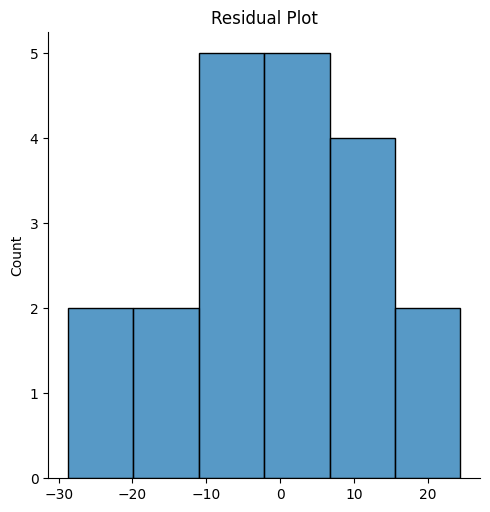

In [92]:
plt.figure()
sns.displot(residual)
plt.title("Residual Plot")

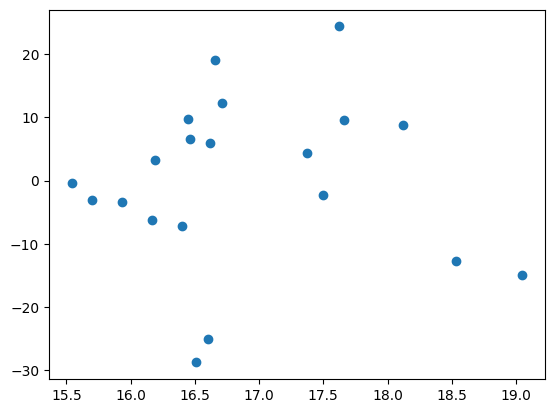

In [93]:
plt.scatter(X_train, residual)
plt.show()

In [94]:
lr_model.summary() # OLS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     48.72
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.61e-06
Time:                        13:39:48   Log-Likelihood:                -79.848
No. Observations:                  20   AIC:                             163.7
Df Residuals:                      18   BIC:                             165.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        645.1597     57.083     11.302      0.000     525.233     765.086
x4           -23.5554      3.375     -6.980      0.000     -30.646     -16.465
==============================================================================
Omnibus:                        1.073   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.617
Skew:                          -0.425   Prob(JB):                        0.735
Kurtosis:                       2.865   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2-c. Find a 99% CI on the slope.

In [95]:
coefficients = lm.coef_
mse_resid = np.mean((lm.predict(X_train_lm) - y_train_lm) ** 2)
n = len(y_train_lm)
k = len(X_train_lm[0])
std_err = np.sqrt(mse_resid / (n - k) * np.diag(np.linalg.inv(np.dot(X_train_lm.T, X_train_lm))))
alpha = 0.01
t_value = stats.t.ppf(1 - alpha / 2, n - k)
conf_int = np.vstack((coefficients - t_value * std_err, coefficients + t_value * std_err)).T
print(conf_int)

[[-23.66921134 -23.44168325]]


## 2-d. Calculate R2.

In [98]:
prediction = lm.predict(X_test_lm)
residual = (y_test_lm - prediction)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_lm, prediction)
r_squared = r2_score(y_test_lm, prediction)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 99.97207514000547
r_square_value : 0.43499054661161696
